# Notebook zu Blatt 8

In [91]:
!pip install numpy seaborn

In [92]:
import numpy as np      # um zufällige arrays zu generieren
import time             # zur zeitmessung
import seaborn as sns   # zum plotten
import matplotlib.pyplot as plt

####  1. Implementieren Sie Selection Sort und Quicksort in Python

In [93]:
def selectionSort(array):
    """
     Traverse by every step the unsorted part of the given Array,
     pick the smallest element and put it into the sorted part
    :param array: the given array to be sorted
    :return: the sorted array
    """
    for i in range(len(array)):
        min_idx = i
        for j in range(i + 1, len(array)):
            # Traverse the unsorted part to find the smallest element
            if array[min_idx] > array[j]:
                min_idx = j
        array[i], array[min_idx] = array[min_idx], array[i]
        # switch elements, now elements with index up to i belongs to the sorted part, the rest unsorted.
    return array

In [94]:
array = [7,5,8,1] 
selectionSort(array)
print(array) # das sortierte array

[1, 5, 7, 8]


In [95]:
def quickSort(array):
    if len(array) <= 1:
        # Start of Recursion: singleton array is sorted
        return array
    pivot = array[0]
    # Take the first number of the array as the pivot value
    llist, mlist, rlist = [], [], []
    # Define empty lists to store elements greater than/less than/equal to the base value
    for i in range(0, len(array)):
        # Traverse the array and categorize the elements into three parts
        if array[i] < pivot:
            llist.append(array[i])
        elif array[i] > pivot:
            rlist.append(array[i])
        else:
            mlist.append(array[i])
    return quickSort(llist) + mlist + quickSort(rlist) # Recursive call: put all sorted parts together

In [96]:
array = [7,5,8,1] 
quickSort(array)
print(array) # das sortierte array

[7, 5, 8, 1]


####  2. Erläutern Sie kurz die Rolle des Pivot-Elements. Wie wird das Pivot-Element in Ihrer Implementierung gewählt?

 Das Pivot-Element dient als die Grenze um die Werte vom gegebenen Array A in A< (Elemente kleiner als Pivot), A= (Elemente gleich Pivot) und A> (Elemente größer als Pivot) aufzuteilen. Die 3 Teile werden dann durch rekursive Aufrufe sortiert (außer A=) und nach Reihenfolge verbunden.

 Die Idee ist das Pivot am möglichsten in der Mitte auszuwählen, sodass sich die Länge n bei rekursiven Aufrufen proportional verkleinert und Laufzeit nach nlogn geht.
 Wir haben das erste Element aus dem Array als Pivot ausgewählt, da die Reihenfolge der Elemente randomisiert ist.

#### 3. Gibt es für Ihre Implementierungen von Selection Sort und Quicksort worst-case Eingaben? Falls ja, welche?

Selection Sort: nein, im Sinne von O-Notation. Auf jedem Fall werden beim i-ten Schritt alle Elemente ab das i-te durchgelaufen um das Minimum auszufinden. Es kann wenigere Zuweisungsoperationen geben, falls die Eingabe bereits teilweise sortiert ist, aber die Laufzeit bleibt immer O(n^2).

Quick Sort: Ja, falls das erste Element immer das größte oder kleiste ist, verkleinert sich das betrachtete Array bei jedem Schritt nur um |A=|. D.h. die Laufzeit geht zu O(n^2).

#### 4. Testen Sie die Korrektheit Ihrer Implementierungen anhand von verschiedenen Testfällen

In [97]:
# !!!!Formale Teste: siehe die unit-test Dateien!!!!

array1 = [8,7,6,5,4,3,2,1]
print("expected 1:" , [1,2,3,4,5,6,7,8])
array1_s=selectionSort(array1)
print("selectionSort 1:" , array1_s)
array1_q=quickSort(array1)
print("quickSort 1:" , array1_q)

array2 = [1,2,3,4,5,6,7,8]
print("expected 2:" , [1,2,3,4,5,6,7,8])
array2_s=selectionSort(array2)
print("selectionSort 2:" , array2_s)
array2_q=quickSort(array2)
print("quickSort 2:" , array2_q)


array3 = [3]
print("expected 3:" , [3])
array3_s=selectionSort(array3)
print("selectionSort 3:" , array3_s)
array3_q=quickSort(array3)
print("quickSort 3:" , array3_q)

array4 = [5,8,7,4,3,8,2,1,6]
print("expected 4:" , [1,2,3,4,5,6,7,8,8])
array4_s=selectionSort(array4)
print("selectionSort 4:" , array4_s)
array4_q=quickSort(array4)
print("quickSort 4:" , array4_q)

array5 = []
print("expected 5:" , [])
array5_s=selectionSort(array5)
print("selectionSort 5:" , array5_s)
array5_q=quickSort(array5)
print("quickSort 5:" , array5_q)

expected 1: [1, 2, 3, 4, 5, 6, 7, 8]
selectionSort 1: [1, 2, 3, 4, 5, 6, 7, 8]
quickSort 1: [1, 2, 3, 4, 5, 6, 7, 8]
expected 2: [1, 2, 3, 4, 5, 6, 7, 8]
selectionSort 2: [1, 2, 3, 4, 5, 6, 7, 8]
quickSort 2: [1, 2, 3, 4, 5, 6, 7, 8]
expected 3: [3]
selectionSort 3: [3]
quickSort 3: [3]
expected 4: [1, 2, 3, 4, 5, 6, 7, 8, 8]
selectionSort 4: [1, 2, 3, 4, 5, 6, 7, 8, 8]
quickSort 4: [1, 2, 3, 4, 5, 6, 7, 8, 8]
expected 5: []
selectionSort 5: []
quickSort 5: []


#### 5. Messen Sie die Laufzeit der beiden Sortieralgorithmen auf Ihrem Rechner.

In [98]:
s_times, q_times = [], []
array_sizes =  [10, 100, 500, 1000, 1500, 2000, 2500, 3000, 5000, 7500, 10000] # messung für verschiedenen array-längen
for size in array_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size) 
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?
    selectionSort(array)
    end = time.time()
    s_times.append(end-start) # die zeit in sekunden
print(s_times)

    # und dann jetzt noch für quicksort :)
for size in array_sizes:
    # ziehe ein zufälliges array
    np.random.seed(0)
    array = np.random.randint(low=0, high=1000000, size=size)
    start = time.time()
    # hier sortieren mit selection sort - wie geht das?
    quickSort(array)
    end = time.time()
    q_times.append(end-start) # die zeit in sekunden
print(q_times)

[0.0, 0.0, 0.014934062957763672, 0.05676889419555664, 0.12642288208007812, 0.20893573760986328, 0.31992530822753906, 0.4636881351470947, 1.2776379585266113, 2.879749059677124, 5.103509187698364]
[0.0, 0.0, 0.0009629726409912109, 0.001026153564453125, 0.0019960403442382812, 0.001997232437133789, 0.0039577484130859375, 0.0030236244201660156, 0.006983041763305664, 0.009972572326660156, 0.01861286163330078]


#### 6. Erstellen Sie einen geeignent Plot, der die Laufzeit der beiden Algorithmen in Abhängigkeit von der Eingabelänge darstellt

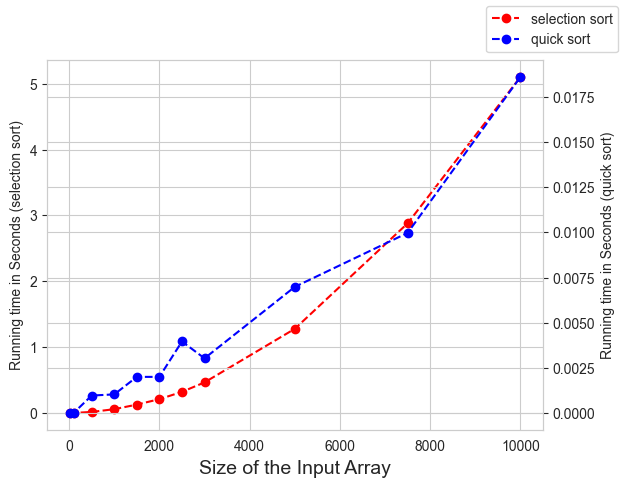

In [99]:
# Parameters
x = array_sizes
y = s_times
z = q_times
# Selection sort
fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(x, y, color= "red", linestyle='dashed', marker= "o", label= "selection sort")
ax.set_xlabel("Size of the Input Array", fontsize = 14)
ax.set_ylabel("Running time in Seconds (selection sort)")
# Quick sort
ax2 = ax.twinx()
ax2.plot(x, z, color= "blue", linestyle='dashed', marker= "o", label= "quick sort")
ax2.set_ylabel("Running time in Seconds (quick sort)")
fig.legend(loc=1)

Ab die dritte Gruppe (Länge 500) macht sich der Unterschied in asymptotischen Laufzeit erkennbar.

#### 7. Erstellen Sie für die beiden Sortieralgorithmen jeweils einen Plot, in dem gemessene Laufzeit durch die entsprechende asymptotische Laufzeitentwicklung approximiert wird.

We divide the last running time value through n = 10000 to estimate the constant C, because for biggest n the other terms of actual function T(n) has the smallest influence on the result.
Siehe auch die Kommentare in Codes

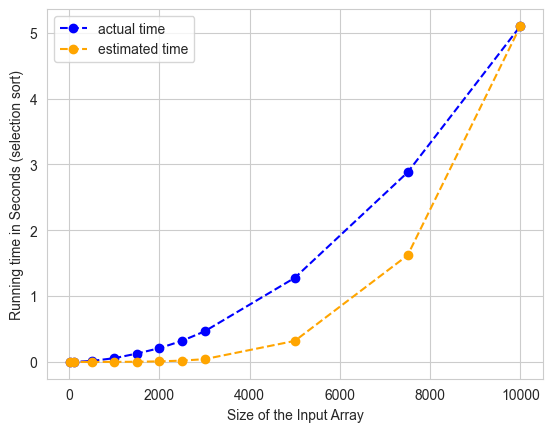

In [100]:
"""
According to O-Notation the running time is approximately T(n) = C * n^2
Now calculate C with the data form the last group, where other polynom terms can be neglected
"""
# Selection sort
n_cubic = array_sizes * np.array(array_sizes) # n^2
C =  s_times / n_cubic[-1] # C = T(n) / n^2
t_asympt = C * n_cubic # T(n)_asympt = C * n^2

x = array_sizes
y1 = s_times
y2 = t_asympt

plt.plot(x, y1 , color= "blue", linestyle='dashed', marker= "o", label= "actual time")
plt.plot(x, y2 , color= "orange", linestyle='dashed', marker= "o", label= "estimated time")
plt.xlabel("Size of the Input Array")
plt.ylabel("Running time in Seconds (selection sort)")
plt.legend()
plt.show()

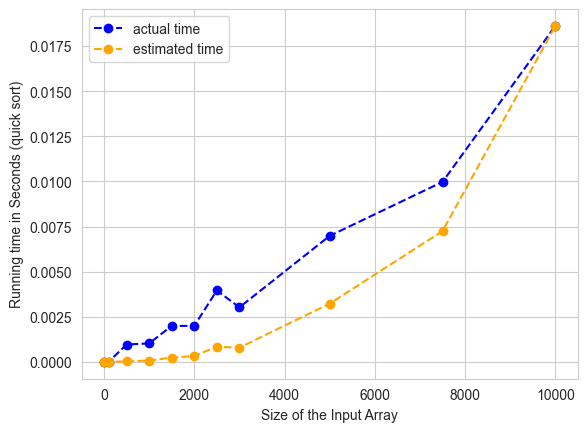

In [101]:
"""
According to O-Notation the running time is approximately T(n) = C * nlogn
Now calculate C with the data form the last group, where other polynom terms can be neglected
"""
# Quick sort
n_nlogn = array_sizes * np.array(np.log(array_sizes)) # nlogn
C =  q_times / n_nlogn[-1] # C = T(n) / n^2
t_asympt = C * n_nlogn # T(n)_asympt = C * n^2

x = array_sizes
y1 = q_times
y2 = t_asympt

plt.plot(x, y1 , color= "blue", linestyle='dashed', marker= "o", label= "actual time")
plt.plot(x, y2 , color= "orange", linestyle='dashed', marker= "o", label= "estimated time")
plt.xlabel("Size of the Input Array")
plt.ylabel("Running time in Seconds (quick sort)")
plt.legend()
plt.show()

#### 8. Vergleichen Sie die Laufzeit ihrer effizienten Implementierungen mit der Laufzeit der nativen sort() Funktion für Listen in Python

In [102]:
# Hier kommt eure Laufzeitanalyse!